In [1]:
# BSOS233 Lecture on Confidence Intervals
# Jupyter Notebook created by Jacob J. Coutts

# These lines import the Numpy and Datascience modules.
import numpy as np
import datascience as ds
import statistics as s
# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
population = ds.Table.read_table("stem_salaries.csv") # read in data
our_sample = population.sample(200, with_replacement = False) # draw sample from data
print("The median of the population is", np.median(population.column("basesalary")), "compared to the sample mean of", np.median(our_sample.column("basesalary")))

The median of the population is 186760.0 compared to the sample mean of 189875.5


/usr/local/lib/python3.8/dist-packages/datascience/tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


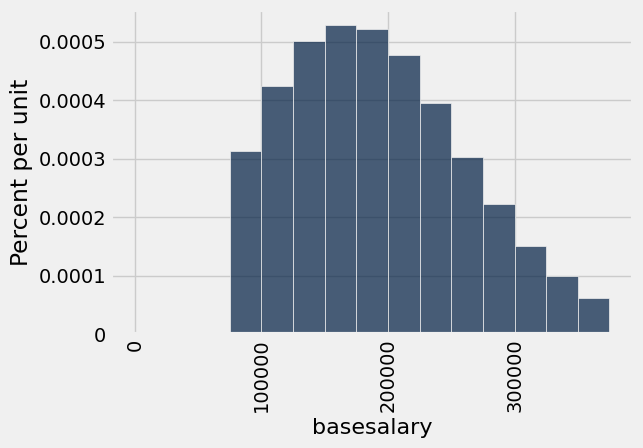

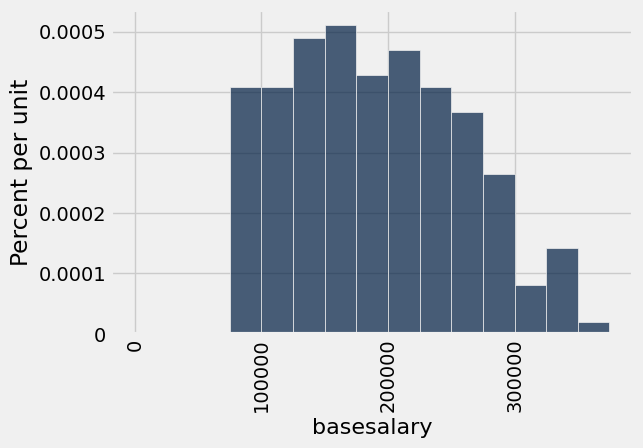

In [3]:
stem_bins = np.arange(0, 400000, 25000)
population.hist("basesalary", bins=stem_bins) # visualize population
our_sample.hist("basesalary", bins=stem_bins) # visualize sample

In [4]:
# create function to draw one bootstrap sample
def bootstrap_sample(data, col = ""):
    """ generates one bootstrap resample for the median of dataset
    data = Table of data
    col = name of column you're interested in from Table """
    subset = data.select(col)
    n = data.num_rows # obtain sample size for resamples
    bootsamp = subset.sample(n, with_replacement = True)
    return np.median(bootsamp.column(col))

bootstrap_sample(our_sample, col = "basesalary")

183891.5

In [5]:
# set simulation/bootstrap parameters
B = 1000 # set number of bootstrap samples
boot_results = ds.make_array() # create empty array to store results

# do this 1000 times to create empirical sampling distribution
for i in np.arange(B):
    boot_results = np.append(boot_results, bootstrap_sample(our_sample, "basesalary"))

check = np.percentile(boot_results, [2.5, 97.5])
check

array([ 171126.   ,  205384.075])

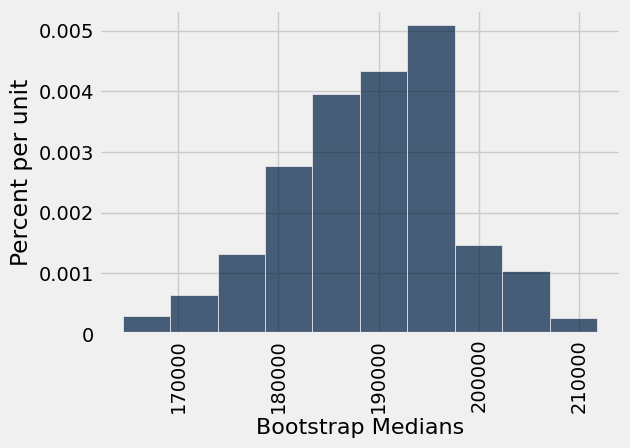

In [6]:
# convert to table so we can visualize with histogram
tot_res = ds.Table().with_columns(
    "Bootstrap Medians", boot_results,
)
tot_res.select("Bootstrap Medians").hist()